# PHE Analysis

Created by Michael George (AKA Logiqx)

Website: https://logiqx.github.io/covid-stats/

In [358]:
import os, sys

projdir = os.path.realpath(os.path.join(sys.path[0], '..'))

In [359]:
class Printable:
    def __repr__(self):
        return str(self.__class__) + ": " + str(self.__dict__)

    def __str__(self):
        return str(self.__class__) + ": " + str(self.__dict__)

In [360]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

class Area(Printable):
    def __init__(self, areaType, areaName):
        """Initialisise the area object"""

        self.areaType = areaType
        self.areaName = areaName
        self.csvName = areaName.lower().replace(' ', '_') + '.csv'
        
        for word in 'of', 'and', 'the':
            self.csvName = self.csvName.replace(word + '_', '')

        self.rows = {}


    def load(self, dirName):
        """Load demographic data - cases or deaths"""

        fieldPrefixes = [dirName, "rollingRate", "rollingSum"]
        self.rows = {}
        for fieldPrefix in fieldPrefixes:
            self.rows[fieldPrefix] = []
        self.dates = []

        try:
            csvPath = os.path.join(projdir, "data", "phe-dashboard", "csv", dirName, "demographics", self.areaType)
            csvFn = os.path.join(csvPath, self.csvName)

            # Generate the CSV from raw data
            with open(csvFn, 'r') as f:
                reader = csv.reader(f, delimiter = ',')
                rowNo = 0
                for row in reader:
                    rows = {}
                    for fieldPrefix in fieldPrefixes:
                        rows[fieldPrefix] = []
                    
                    if rowNo == 0:
                        self.colNames = row
                        #print(row)
                    else:
                        self.dates.append(row[0])

                        for i in range(len(row)):
                            for fieldPrefix in fieldPrefixes:
                                if self.colNames[i].startswith(fieldPrefix):
                                    if fieldPrefix == "cases":
                                        rows[fieldPrefix].append(int(row[i]))
                                    else:
                                        rows[fieldPrefix].append(row[i])

                        for fieldPrefix in fieldPrefixes:
                            self.rows[fieldPrefix].append(rows[fieldPrefix])

                    rowNo += 1
                   
        # General catch all
        except:
            print(f"Failed to load {dirName} for {self.areaName}")
            raise


    def loadCases(self):
        """Load cases by specimen date age demographics"""

        self.load("cases")
            

    def loadDeaths(self):
        """Load deaths within 28 days of positive test by date of death age demographics"""

        self.load("deaths")


    def plotCases(self):
        """Plot cases by specimen date age demographics"""
        
        x_points = np.arange(len(self.rows['cases']))
        y_points = np.array(self.rows['cases'])

        # Create new figure
        plt.figure(figsize=(16, 9))  
        
        # Plot data
        for plot in range(len(self.rows['cases'][0])):
            y_smooth = savgol_filter(y_points[:, plot], 51, 5)
            plt.plot(x_points, y_points[:, plot], label = 'raw') #, color='green', linewidth=2)
            plt.plot(x_points, y_smooth, label = 'raw') #, color='green', linewidth=2)

        # Set xticks
        plt.xticks(np.arange(0, len(self.dates) - 1, step=7), self.dates[::7], rotation=90)
        
        # Add title, axis labels and legend
        plt.title('Daily Cases Test')
        plt.ylabel('Number of cases')
        plt.legend()

        
        # Show figure
        plt.show()

Loading England...


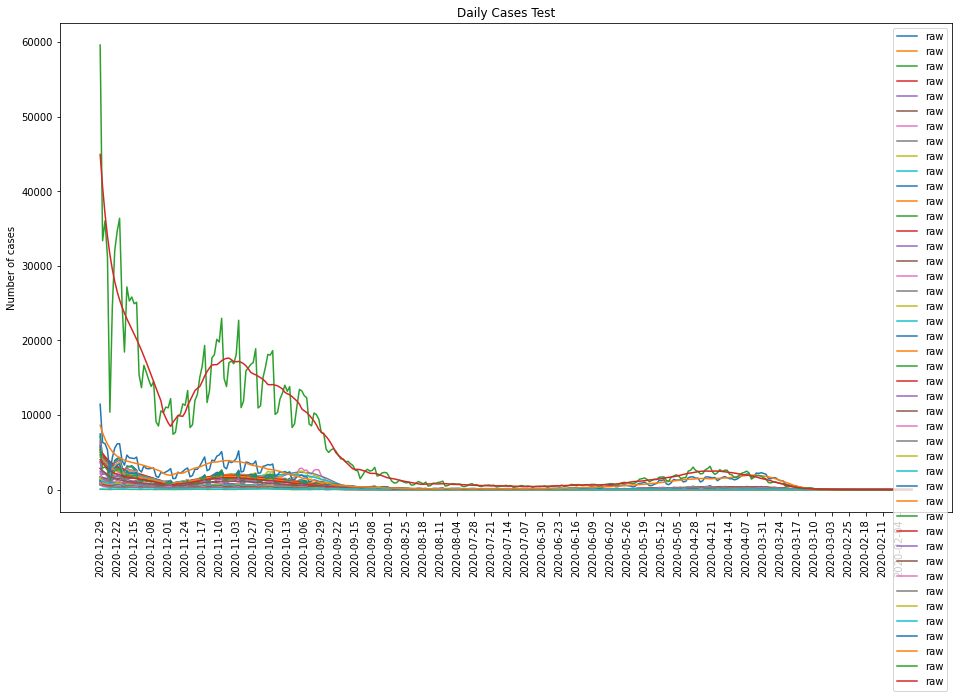

All done!


In [361]:
areaNames = ['North West', 'North East', 'Yorkshire and The Humber',
             'West Midlands', 'East Midlands',
             'East of England', 'London', 'South East', 
             'South West'
           ]

ltlaNames = ["Dorset", "Bournemouth, Christchurch and Poole",
             "Stevenage", "Welwyn Hatfield", "North Hertfordshire", "East Hertfordshire",
             "Sandwell", "Dudley", "Birmingham",
             "Derbyshire Dales", "North East Derbyshire", "High Peak", "Sheffield",
             "Croydon"]

# Load demographic data for England
areaName = 'England'
print(f"Loading {areaName}...")
area = Area("nation", areaName)
area.loadCases()
area.plotCases()
#area.loadDeaths()

# Load demographic data for the regions in England
for areaName in areaNames:
    pass
    #print(f"Loading {areaName}...")
    area = Area("region", areaName)
    #area.loadCases()
    #area.loadDeaths()

# Load demographic data for the regions in England
for ltlaName in ltlaNames:
    pass
    #print(f"Downloading {ltlaName}...")
    area = Area("ltla", ltlaName)
    #area.downloadCases()

print("All done!")